## TASK 1: TITANIC SURVIVAL PREDICTION
##### Author: Sharjeel
##### Domain: Data Science
##### Batch: DECEMBER BATCH A92

### Problem Statement 
The Titanic tragedy of 1912 saw over 1,500 lives lost, with survival influenced by factors like age, gender, and passenger class. This project aims to build a predictive model to determine whether a passenger survived based on their details, such as age, gender, fare, and class. By analyzing these factors, we seek to uncover survival patterns and develop an accurate prediction system while exploring key data science techniques.


### Aim
The aim of this project is to develop a machine learning model that predicts the likelihood of a passenger surviving the Titanic disaster based on their demographic and socio-economic features.


### Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building, and Model Testing will be implemented. We will analyze the Titanic dataset to understand the key factors influencing survival and prepare it for modeling. Different machine learning algorithms, such as Logistic Regression, Decision Trees, and Random Forests, will be tried to identify the best fit for the survival prediction task.


### Content
The columns are resembling practical world features. The Survived column indicates 1 if survived else 0. The data has 12 features which helps us analyze if the person survived or not.



### Features
Input/Features
1. PassengerId
2. Pclass
3. Name
4. Sex
5. Age
6. SibSp
7. Parch
8. Ticket
9. Fare
10. Cabin
11. Embarked


Output/Labels

12. Survived

### Procedure
1. Importing and checking the dataset
   
2. EDA
   
3. Feature Engineering
   
4. Data Cleaning
   
5. Preprocessing
    
6. Label Encoding
    
7. Sampling
    
8. Model Building
    
9. Evaluation
    
10. Conclusion

























### Importing and checking the dataset


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
tt=pd.read_csv(r"C:\Users\hp\Downloads\CodSoft-Datasets\Titanic-Dataset.csv")

In [14]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
tt.shape

(891, 12)

In [18]:
tt.isna().sum()[tt.isna().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Observations

1. Survived 0 means not survived and 1 means survived.
2. Data contains 891 rows and 12 columns.
3. Data contains missing values in Age,cabin and Embarked columns.
4. Survived is target variable.
5. Mean Age of survivors is 29 years.
6. Passenger Id does not influence survival so it can be removed.
7. Ticket does not influence survival so it can be removed.
8. Cabin contains too many nulls and is not very helpful for model building so it can be removed.
9. Name is not highly useful for the predictions so it can be removed.

### EDA

##### Univariate Analysis

Majority of the people did not survived

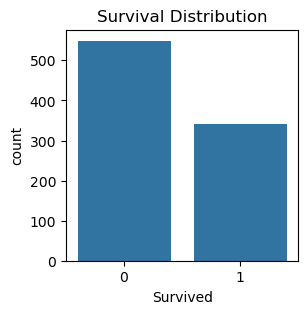

In [35]:
plt.figure(figsize=(3,3))
sns.countplot(x="Survived",data=tt)
plt.title('Survival Distribution')
plt.show()

Age distribution is right skewed,
Dataset contains more younger people than older people

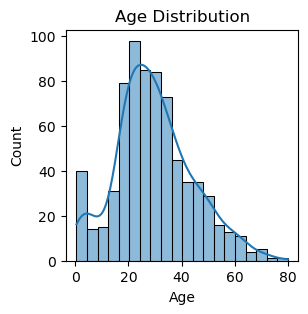

In [40]:
plt.figure(figsize=(3,3))
sns.histplot(tt['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Small percentage of people paid high fare prices and they survived

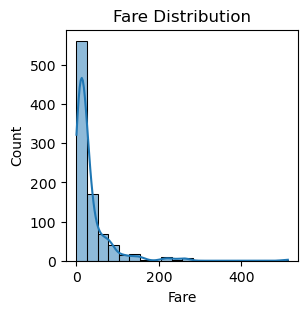

In [46]:
plt.figure(figsize=(3,3))
sns.histplot(tt['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

##### Checking Outliers

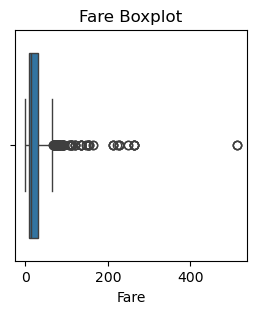

In [53]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Fare', data=tt)
plt.title('Fare Boxplot')
plt.show()

##### Countplots for categorical features

1. majority of the people were travelling in 3rd class.
2. majority of the people were male.
3. majority of the people embarked on Southampton port.

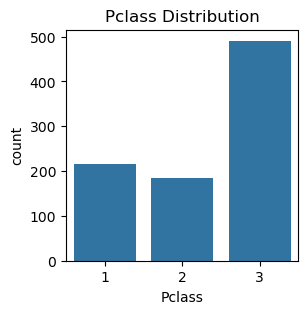

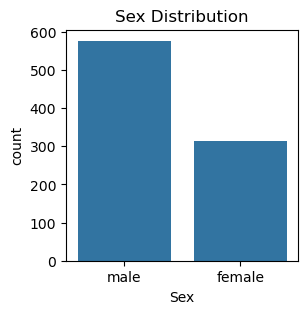

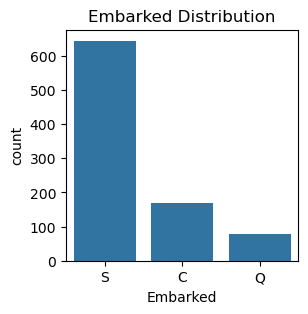

In [62]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(3,3))
    sns.countplot(x=feature, data=tt)
    plt.title(f'{feature} Distribution')
    plt.show()

##### Bivariate Analysis

Survival rate by Pclass

Most of the people travelling in 1st & 2nd class survived

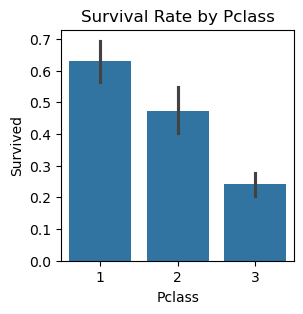

In [69]:
plt.figure(figsize=(3,3))
sns.barplot(x='Pclass', y='Survived',data=tt)
plt.title('Survival Rate by Pclass')
plt.show()

Survival rate by Sex

Majority of the females survived and majority of the males did not survived.

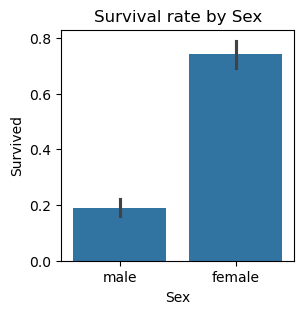

In [79]:
plt.figure(figsize=(3,3))
sns.barplot(x="Sex",y="Survived",data=tt)
plt.title("Survival rate by Sex")
plt.show()

Survival rate by Embarked

Majority of the people who embarked on Cherbourg port survived, followed by Queenstown port.

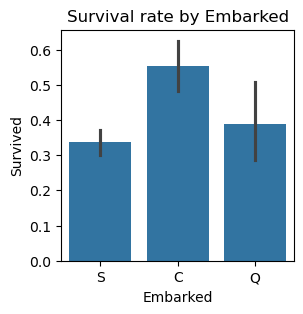

In [86]:
plt.figure(figsize=(3,3))
sns.barplot(x="Embarked",y="Survived",data=tt)
plt.title("Survival rate by Embarked")
plt.show()

##### Multivariate Analysis

Survival rate by Pclass and Sex

sns.catplot manages its own figure size

Majority of people who did not survived were travelling in 3rd class and they were male.

<Figure size 300x300 with 0 Axes>

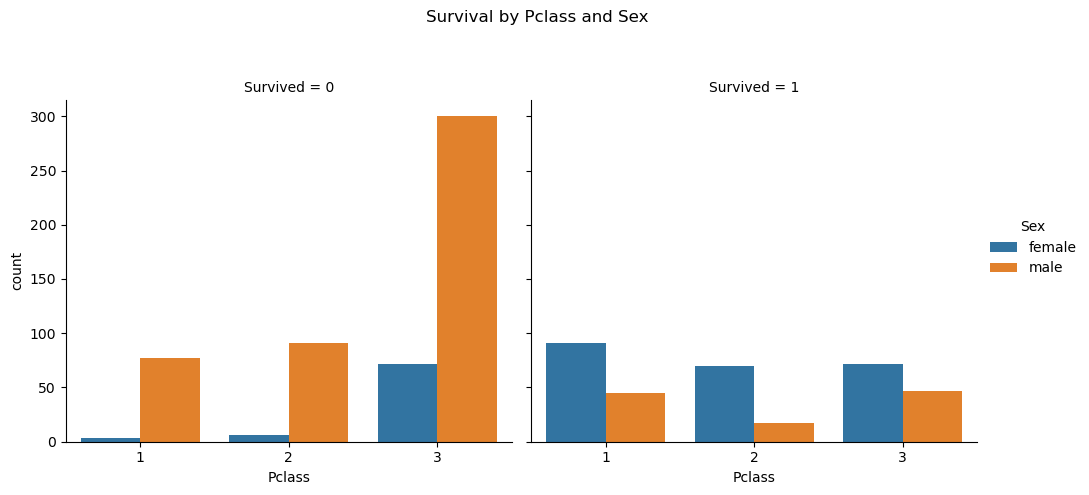

In [95]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=tt, kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Pclass and Sex')
plt.show()

Survival by multiple features

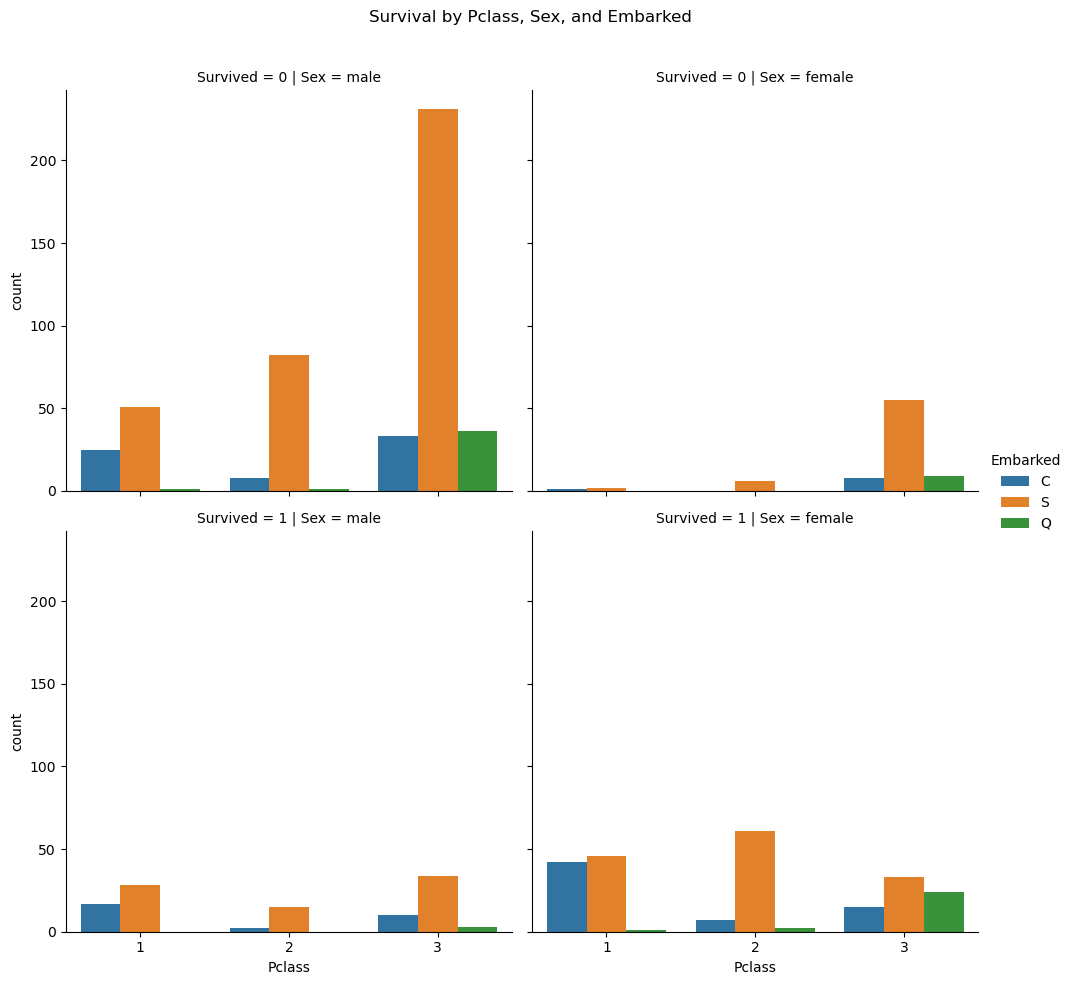

In [101]:
sns.catplot(x='Pclass', hue='Embarked', col='Sex', data=tt, kind='count', row='Survived')
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival by Pclass, Sex, and Embarked')
plt.show()

### Data Cleaning

In [107]:
tt.drop(["PassengerId"], axis=1, inplace=True)
tt.drop(["Ticket"],axis=1,inplace=True)
tt.drop(["Cabin"],axis=1,inplace=True)
tt.drop(["Name"],axis=1,inplace=True)

In [109]:
tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [111]:
tt.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [113]:
tt.isna().sum()[tt.isna().sum()>0]

Age         177
Embarked      2
dtype: int64

In [115]:
tt.Age.fillna(tt.Age.mean(),inplace=True)
tt.Embarked.fillna("S",inplace=True)

In [117]:
tt.isna().sum()[tt.isna().sum()>0]

Series([], dtype: int64)

In [119]:
tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [121]:
tt.select_dtypes(include="object").columns

Index(['Sex', 'Embarked'], dtype='object')

In [123]:
tt.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Data Preprocessing

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tt["Sex"]=le.fit_transform(tt["Sex"])
tt["Embarked"]=le.fit_transform(tt["Embarked"])

In [128]:
tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Sampling

In [131]:
from sklearn.model_selection import train_test_split
tt_train,tt_test=train_test_split(tt,test_size=.2,random_state=100)

In [133]:
tt_train_x=tt.iloc[:,1::]
tt_train_y=tt.Survived
tt_test_x=tt.iloc[:,1::]
tt_test_y=tt.Survived

### Model Building (Logistic Regression)

In [136]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(tt_train_x,tt_train_y)

LogisticRegression()

In [138]:
pred_log=logreg.predict(tt_test_x)
pred_log

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

### Evaluating the model performance

In [141]:
from sklearn.metrics import *
tab1 = confusion_matrix(tt_test_y,pred_log)
tab1

array([[473,  76],
       [102, 240]], dtype=int64)

In [143]:
print(classification_report(tt_test_y,pred_log))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



### Model Building (Decision Tree)

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(tt_train_x,tt_train_y)

DecisionTreeClassifier()

In [148]:
pred_dt=dt.predict(tt_test_x)
pred_dt

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Evaluating the model performance

In [151]:
from sklearn.metrics import *
tab2 = confusion_matrix(tt_test_y,pred_dt)
tab2

array([[547,   2],
       [ 14, 328]], dtype=int64)

In [153]:
print(classification_report(tt_test_y,pred_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



### Model Building (Random Forest)

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(tt_train_x,tt_train_y)

RandomForestClassifier()

In [158]:
pred_rf=rf.predict(tt_test_x)
pred_rf

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Evaluating the model performance

In [161]:
from sklearn.metrics import *
tab3 = confusion_matrix(tt_test_y,pred_dt)
tab3

array([[547,   2],
       [ 14, 328]], dtype=int64)

In [163]:
print(classification_report(tt_test_y,pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.98      0.97      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



##### Correlation Analysis

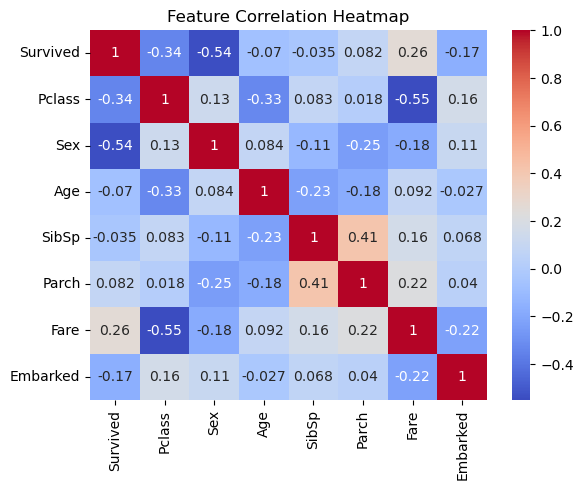

In [166]:
correlation_matrix = tt.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Conclusion

#### Random Forest gives highest accuracy among all models i.e. 98%.
#### Model seems to be good for both the classes means dataset is balanced.